## K-means

Es usado cuando unicamente se tiene evidencia empirica, [k-means](https://en.wikipedia.org/wiki/K-means_clustering) es probablemente el algoritmo de clustering más popular. El algoritmo en sí mismo es relativamente simple: Se comienza con un número preestablecido de centros de los clusters (que pueden ser distribuidos aleatoriamente o de manera inteligente (ver "k-means++")), cada punto se asigna inicialmente a su centro más cercano. En el siguiente paso, para cada cluster, los centros se desplazan al centroide de los puntos de los clusters. Los puntos son entonces reasignados a su centro más cercano. El proceso se repite hasta que al mover los centros hasta que se obtiene poca o ninguna mejora (medida por la suma de cuadrados del interior del cluster - la distancia total al cuadrado entre cada punto y su centro de cluster). El alogoritmo está ilustrado concisamente por el GIF a continuación.

![title](https://dashee87.github.io/images/kmeans.gif)

Las variaciones del algoritmo de los k-medios incluyen [k-medoides](https://en.wikipedia.org/wiki/K-medoids) y [k-medios](https://en.wikipedia.org/wiki/K-medians_clustering), donde los centroides se actualizan a los [medoides](https://en.wikipedia.org/wiki/Medoid) y la mediana de los clusters existentes, de forma repentina. Obsérvese que, bajo k-medoides, los centroides de los clusters deben corresponder a los miembros del conjunto de datos. Los alogoritmos de la familia de los k-mediodos son sensibles a la posición de partida de los centros de los clusters, a medida que cada método converge con el óptico local, cuya frecuencia aumenta en dimensiones superiores. Esta cuestión se ilustra para k-means en el GIF que figura a continuación.

![title](https://dashee87.github.io/images/kmeans_bad.gif)

El clustering de k-medios en scikit ofrece varias extensiones del enfoque tradicional. Para evitar que el alogritmo devuelva una agrupación subóptima, el método k-medios incluye los parámetros n_init y del método. El primero sólo vuelve a ejecutar el algoritmo con n inicializaciones diferentes y devuelve el mejor resultado (medido por la suma de cuadrados dentro del cluster). Al establecer el segundo como "kmeans++" (el valor por defecto), los centros iniciales se seleccionan de forma inteligente (es decir, mejor que el aleatorio). Esto tiene el beneficio adicional de disminuir el tiempo de ejecución (menos pasos para alcanzar la convergencia).


Usaremos las liberias de:

1.   Matplotlib para graficar https://matplotlib.org/3.3.2/contents.html
3.   Sklearn para obtener los datasets y los algoritmos de clusterizacion https://scikit-learn.org/stable/

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Para la clusterizacion o agrupamiento de datos, primero debemos definir cuantos ejemplos vamos a tomar en total, los puntos centrales con los cuales vamos a agrupar los datos, y el numero de clases que pretendemos tener para este proceso.

In [2]:
# Configuration options
num_samples_total = 1000
cluster_centers = [(0,0)]
num_classes = len(cluster_centers)

Generamos una cantidad (1000) de datos aleatorios a traves de "blobs" en los cuales vamos a buscar los vecinos mas cercanos a los centroides que declaramos

Text(0, 0.5, 'Variable Y')

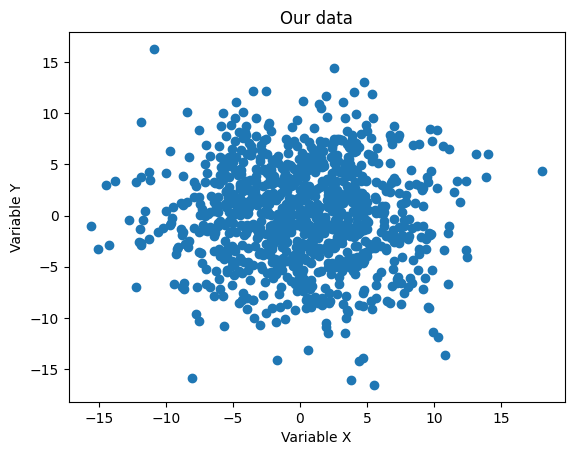

In [7]:
# Generate data
X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 5)

plt.scatter(X[:,0], X[:,1], marker="o", picker=True)
plt.title('Our data')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')

Declaramos y generamos el clusterizador (agrupador) de k medias mas informacion y procedemos a realizar la prediccion.
La pueden encontrar en https://scikit-learn.org/stable/modules/clustering.html#k-means

In [8]:
# Fit K-means with Scikit
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(X)
# Predict the cluster for all the samples
P = kmeans.predict(X)
print(P)

[0 2 1 2 0 4 2 4 0 0 4 2 0 4 0 2 4 1 3 1 1 3 4 1 3 0 4 1 0 0 4 3 3 0 0 1 2
 3 1 2 3 2 0 4 2 1 0 2 3 3 0 4 1 1 3 4 0 3 4 0 0 4 0 4 0 4 2 4 3 4 2 3 0 4
 2 4 3 4 3 3 4 4 0 4 4 1 4 0 4 3 3 3 2 4 4 2 2 2 0 0 0 1 3 0 0 1 4 2 1 2 1
 3 4 1 2 2 2 2 2 1 4 1 2 4 1 0 1 0 2 2 2 0 0 4 1 0 2 0 1 0 2 1 0 3 4 1 4 0
 1 3 2 1 4 2 4 2 3 0 4 2 2 4 2 2 4 1 1 4 2 0 0 3 3 4 0 3 0 4 1 2 4 1 3 4 4
 4 0 0 0 0 2 3 3 3 2 3 1 3 0 0 0 0 0 3 0 4 2 4 0 0 2 0 3 0 4 3 1 3 3 0 4 2
 4 2 3 4 4 0 0 3 2 0 1 2 0 0 4 1 2 0 4 3 1 3 2 4 4 3 1 2 0 1 4 0 0 0 1 0 2
 3 0 3 2 2 4 2 4 2 0 4 1 2 4 3 2 4 3 0 3 2 0 0 3 4 0 4 0 2 3 0 2 0 0 2 0 3
 0 3 4 2 2 4 3 4 3 3 0 4 2 1 3 4 0 2 1 0 3 1 0 0 3 3 4 2 3 3 4 1 2 3 4 1 0
 4 0 3 4 1 2 4 3 3 0 1 4 3 2 1 3 3 0 3 2 0 3 2 4 1 4 2 0 3 0 3 0 3 4 4 0 3
 1 4 0 1 0 3 4 3 4 3 1 3 2 0 3 1 0 1 4 4 3 0 4 0 4 3 3 4 0 3 2 0 2 4 0 1 4
 4 4 3 4 3 4 4 0 4 0 4 4 3 4 4 2 0 4 1 3 4 3 3 3 4 4 1 2 3 4 0 3 4 1 4 0 3
 1 2 2 3 1 3 4 3 0 2 4 3 3 2 1 0 3 0 3 0 3 0 2 1 4 3 2 3 3 0 3 2 2 2 4 3 4
 3 4 2 3 1 3 3 4 2 3 2 2 

Declaramos un Switch case para los colores que usaremos en la grafica, es unicamente visual, se puede declarar de muchas maneras, yo prefiero esta en particular.

In [23]:
def color(i):
  switcher={
      0:'#630C3A',
      1:'#39C8C6',
      2:'#D3500C',
      3:'#FFB139',
      4:'#3b4cc0',
      5:'#b40426',
      }
  return switcher.get(i,"#1052Fb")

Generamos el "scatter plot" o grafico de puntos para los datos que obtivimos del entrenamiento, y observamos los diferentes clusters de informacion que creamos originalmente en la primera linea.

['#39C8C6', '#FFB139', '#D3500C', '#39C8C6', '#39C8C6', '#D3500C', '#630C3A', '#D3500C', '#630C3A', '#630C3A', '#D3500C', '#630C3A', '#D3500C', '#630C3A', '#D3500C', '#FFB139', '#630C3A', '#FFB139', '#3b4cc0', '#D3500C', '#39C8C6', '#FFB139', '#FFB139', '#D3500C', '#39C8C6', '#D3500C', '#3b4cc0', '#3b4cc0', '#39C8C6', '#D3500C', '#3b4cc0', '#D3500C', '#D3500C', '#3b4cc0', '#D3500C', '#3b4cc0', '#3b4cc0', '#3b4cc0', '#D3500C', '#630C3A', '#630C3A', '#3b4cc0', '#39C8C6', '#3b4cc0', '#3b4cc0', '#FFB139', '#39C8C6', '#FFB139', '#630C3A', '#3b4cc0', '#3b4cc0', '#630C3A', '#D3500C', '#630C3A', '#FFB139', '#D3500C', '#630C3A', '#39C8C6', '#FFB139', '#630C3A', '#FFB139', '#D3500C', '#FFB139', '#D3500C', '#630C3A', '#39C8C6', '#630C3A', '#D3500C', '#3b4cc0', '#D3500C', '#D3500C', '#39C8C6', '#FFB139', '#39C8C6', '#3b4cc0', '#3b4cc0', '#FFB139', '#3b4cc0', '#D3500C', '#D3500C', '#39C8C6', '#FFB139', '#D3500C', '#D3500C', '#3b4cc0', '#FFB139', '#630C3A', '#3b4cc0', '#39C8C6', '#39C8C6', '#FFB139'

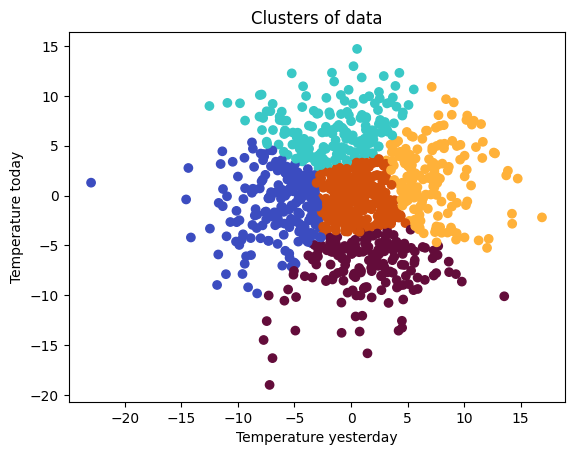

In [24]:
# Generate scatter plot for trained data
colors = list(map(color,P))
print (colors)
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)

plt.title('Clusters of data')
plt.xlabel('Temperature yesterday')
plt.ylabel('Temperature today')
plt.show()